## Final Project Submission


* Student name: Sarabi Eventide 
* Student pace: self-paced
* Scheduled project review date/time: December 21st at 7:30 PM EST 
* Instructor name:  Eli Thomas
* Blog post URL: 


## Obtaining the Data

Before making any decisions about the data, we must define the scope of this data analysis. In order to do so, I shall consider the following questions:
1. Who are the stakeholders in this problem?
    - The stakeholders are Kings County real estate developers.
2. What do they want to know?
    - They want to be able to predict a the price of a house. In order to do this, we need to know how location, size, age and other factors affect the price. 
3. What data is available to me?
    - I have a set of data containing information about the size, rooms, location, age, renovation and quality of the houses.

In [1]:
import pandas as pd # helps manipulate CSV files
import numpy as np  # helps with number crunching
import seaborn as sns # helps with visualizing 
import matplotlib.pyplot as plt  # helps with visualizing
%matplotlib inline
import seaborn as sns # provides extra functionality with visualizations 

In [2]:
df = pd.read_csv('kc_house_data.csv')  # import the file
df.head()  # taking a look at the first few rows
             # to see what type of information I'm working with 

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


Looking at the excerpt, I see a few different ways we can sort and group the data by date, bedrooms, bathrooms, floors, grade, zipcode and proximity to the waterfront. All of these factors will affect the price of the house. I also see that sqft_basement and yr_renovated contain a lot of zeros. Before I begin re-arranging the table, however, I'd like to look at other descriptive measures to see which groups may be more relevant than others. The new information will also help me clean the data.

## Learning the size and shape of the data

In [3]:
df.info() # a quick summary of what the rows and columns contain 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


Right off the bat, we see the waterfront and yr_renovated columns are missing data, but not enough to be dropped right away. 

In [4]:
waterfront_percent = round(((2376/21597)*100),2) 
reno_percent = round(((3842/21597)*100),2)
print(f"We are missing {waterfront_percent} percent of the waterfront data and {reno_percent} percent of the household renovation data")

We are missing 11.0 percent of the waterfront data and 17.79 percent of the household renovation data


In other words, we still have about 90% of the waterfront data and about 80% of the household renovation data. These are sufficient numbers to proceed, however, we must also check the data for placeholder values.

I also see a few columns (waterfront, condition, grade, yr_built, yr_renovated, zipcode) appear to be miscategorized. First, we need to look at the summary statistics to get a better feel for the data. The we need to find out whether there are any anomalies that cause the "sqft_basement" column to be labeled as objects and the "yr_renovated" column to be cast as a float, instead of what I suspect should be at least integers. 

In [5]:
df.describe() # gather summary statistics of the data

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


As I suspected, the waterfront, condition, grade and zipcode values are all categorical. We know this because their distributions are limited and the values are finite. The values in these columns describe quality, rather than quantity. The waterfront column, specifically, is full of boolean values (facing or not facing the waterfront). It is unclear at this moment whether the views column is a boolean (categorical variable) or a view count (quantitative variable). Yr_built, in this case, is a category, but in order to make sorting easier, I will change it to a datetime object. I need to look further into the yr_renovated category, because most of the data is '0', but the max is '2015'. Because sqft_basement is an object, it is not included in the summary statistics. I will need to change the data type in order to explore it. I'll look into each of these specific categories to make decisions. 

## Scrubbing the data

In [6]:
df['condition'].value_counts() #checking for placeholders

3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64

In [7]:
df['grade'].value_counts() 

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

In [9]:
df['zipcode'].unique() # checking for placeholder
# the list is too long to see all the values with value counts. 

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039], dtype=int64)

For grade and condition, I used value_counts() because it would be easy to type, say '1' when a value is missing. If I saw an overwhelming amount of 1s, that would be a sign of a placeholder. In the condition category, we see a lot of 3s, this value makes sense because it is the median value. It would actually be unusual to see a lot of houses that are perfect (5) or in total disrepair (1). For zipcodes, rather than checking whether a value overwhelms the rest, we can check unique values. Because the zipcodes have a set format and are all in the same area, a placeholder number would stick out. To double check, I'll take a look at a histogram.

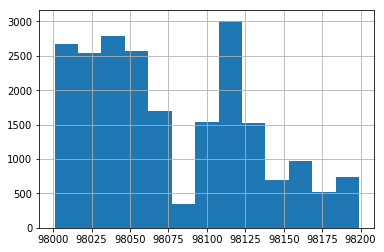

In [8]:
df['zipcode'].hist(bins = 13)

As we can see, none of the values overwhelm the others. There appears to be a relaticely small numner of houses in the zipcodes between 98075 and 98100. This may be because those zipcodes are on the outeredges of the county, and are therefore mostly excluded, or because there is a lake, commercial district, forest, or other feature preventing houses from being built on that land. We see that the majority of houses are between 98000 and 98075. By itself, this information is not very useful yet, but it make my helpful taken in consideration with other variables. 

In [10]:
df['condition'] = df['condition'].astype("category")  # The condition is actually a qualitative variable, not a quantitative one
df['grade'] = df['grade'].astype("category")  # Grade is a qualitative variable
df['zipcode'] = df['zipcode'].astype("category")   # The zipcode is a qualitative variable

The view column is a quantitative variable, so it can remain an integer. It seems the majority of properties have not been viewed, which makes sense because only a small number of houses are for sale at a given time. I am choosing not to drop this category because view counts may give us an indication of which locations are in-demand. A high view count in a certain area means the demand is higher than the supply, which could drive prices up.

In [11]:
df['view'].value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

While I'm in the process of doing quick calculations and cleanups, I'll take a look at the outliers in the bedroom, bathroom and sqft_lot15 columns.

In [12]:
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

Only one house has 33 bedrooms, and this number is far higher than the next largest number of rooms. It seems unlikely that the number of bedrooms would jump from 11 to 33, so it is safe to assume this is a placeholder value. Getting rid of it will give cleaner summary statistics. 

In [13]:
df['bedrooms'].idxmax() # find the large value

15856

In [14]:
df['bedrooms'] = df['bedrooms'].drop([15856]) # drop the value
df['bedrooms'].value_counts() # make sure its gone

3.0     9824
4.0     6882
2.0     2760
5.0     1601
6.0      272
1.0      196
7.0       38
8.0       13
9.0        6
10.0       3
11.0       1
Name: bedrooms, dtype: int64

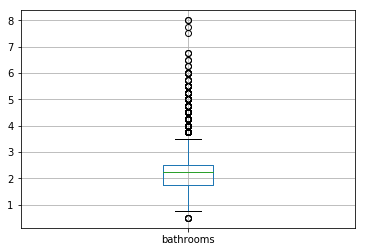

In [15]:
df.boxplot(['bathrooms']) # check for bathroom outliers

Though there are few houses with more than 4 bathrooms, none of the numbers appear obvious ouliers. Therefore, this data is acceptable. 

The summary statistics also show a housing lot that is almost 900,000 square feet. This is almost certainly an outlier (the possible the result of a mis-zoned lot), but I'd like to verify instead. While value counts are useful when you are dealing with a small set of categories, I need to use a data visualization method to look at the square footage, because there is a large range.

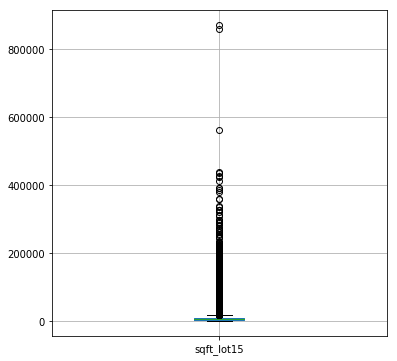

In [16]:
plt.figure(figsize = (6,6))
df.boxplot(['sqft_lot15']) 

The boxplot shows us that there are quite a few values that are land outside of the interquartile range. However, some of these values are several hundred thousand square feet larger than the others. It also seems that the interquartile range is near zero. We already know that 75% of the lots are 10,000 square feet or less, but the mean is around 12000. This means the outliers are influencing the calculations. Removing the biggest outliers will creat handier data, then we can normalize the data later.

In [17]:
df['sqft_lot15'].idxmax() # find the outlier

9705

In [18]:
df['sqft_lot15'] = df['sqft_lot15'].drop([9705]) # remove the outlier
df['sqft_lot15'].describe() #looking at the data again 

count     21596.000000
mean      12718.533478
std       26642.135505
min         651.000000
25%        5100.000000
50%        7620.000000
75%       10080.750000
max      858132.000000
Name: sqft_lot15, dtype: float64

In [19]:
df['sqft_lot15'].idxmax() # find next highest (there were two major outliers on the box plot)

20436

In [20]:
df['sqft_lot15'] = df['sqft_lot15'].drop([20436]) 
df['sqft_lot15'].describe() # checking again

count     21595.000000
mean      12679.384904
std       26014.158784
min         651.000000
25%        5100.000000
50%        7620.000000
75%       10080.000000
max      560617.000000
Name: sqft_lot15, dtype: float64

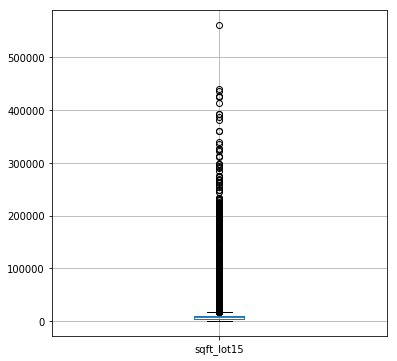

In [21]:
plt.figure(figsize = (6,6))
df.boxplot(['sqft_lot15']) 

This column is far more reasonably distributed than before. Without the large values skewing the square footage column, the calculations will be more accurate. There is still one outlier, but I am choosing to leave this in because the skew it provides will help me determine how the higher outliers will affect my final model.

Now that the "quick fix" scrubbing is complete, it's time to take a close look at the year_renovated column, which has missing values.

In [22]:
df['yr_renovated'].unique() # take a look at the values to look for anomalies

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

Here we see the yr_renovated column has a number of issues, besides being incomplete. First, there are two different ways to denote null values ('0' and 'nan'-- blank cells). Morever, the values are all floats, but there are no numbers following the years. Whereas I had assumed the date was typed as yr.month.day (e.g. 1990.05.23), this is simply a list of years. To clean this column, we need to do two things: 1) determine whether to remove or replace null values and 2) reformat the values so they are simple integers (or potentially, datetime objects). 

In [23]:
df['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
2000.0       29
2005.0       29
1990.0       22
2004.0       22
2009.0       21
1989.0       20
2006.0       20
2002.0       17
1991.0       16
1998.0       16
1984.0       16
1999.0       15
2008.0       15
2010.0       15
2001.0       15
1983.0       15
2015.0       14
1985.0       14
1986.0       14
1987.0       14
1994.0       14
1992.0       13
1993.0       12
1997.0       12
1995.0       12
          ...  
1975.0        5
1964.0        5
1969.0        4
1963.0        4
1973.0        4
1981.0        4
1965.0        4
1978.0        3
1960.0        3
1958.0        3
1956.0        3
1955.0        3
1945.0        3
1972.0        3
1967.0        2
1957.0        2
1940.0        2
1974.0        2
1962.0        2
1953.0        1
1950.0        1
1934.0        1
1944.0        1
1976.0        1
1948.0        1
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Leng

In [24]:
17011/len(df['yr_renovated'])

0.787655692920313

Almost 80% of the data in this column is missing. It's better to drop it than to attempt to clean it and use it. 

In [25]:
df = df.drop(['yr_renovated'], axis = 1)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3.0,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,98178,47.5112,-122.257,1340,5650.0
1,6414100192,12/9/2014,538000.0,3.0,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,98125,47.7210,-122.319,1690,7639.0
2,5631500400,2/25/2015,180000.0,2.0,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,98028,47.7379,-122.233,2720,8062.0
3,2487200875,12/9/2014,604000.0,4.0,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,98136,47.5208,-122.393,1360,5000.0
4,1954400510,2/18/2015,510000.0,3.0,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,98074,47.6168,-122.045,1800,7503.0


Next, let's look at the yr_built column, which holds integers that can probably be turned into datetime objects. 

In [26]:
df.yr_built.unique() #check for obvious place holders

array([1955, 1951, 1933, 1965, 1987, 2001, 1995, 1963, 1960, 2003, 1942,
       1927, 1977, 1900, 1979, 1994, 1916, 1921, 1969, 1947, 1968, 1985,
       1941, 1915, 1909, 1948, 2005, 1929, 1981, 1930, 1904, 1996, 2000,
       1984, 2014, 1922, 1959, 1966, 1953, 1950, 2008, 1991, 1954, 1973,
       1925, 1989, 1972, 1986, 1956, 2002, 1992, 1964, 1952, 1961, 2006,
       1988, 1962, 1939, 1946, 1967, 1975, 1980, 1910, 1983, 1978, 1905,
       1971, 2010, 1945, 1924, 1990, 1914, 1926, 2004, 1923, 2007, 1976,
       1949, 1999, 1901, 1993, 1920, 1997, 1943, 1957, 1940, 1918, 1928,
       1974, 1911, 1936, 1937, 1982, 1908, 1931, 1998, 1913, 2013, 1907,
       1958, 2012, 1912, 2011, 1917, 1932, 1944, 1902, 2009, 1903, 1970,
       2015, 1934, 1938, 1919, 1906, 1935], dtype=int64)

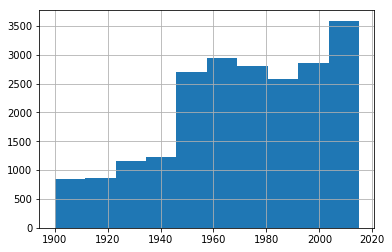

In [27]:
df.yr_built.hist() # check for categories with a seemingly large amount of values

Everything checks out with the yr_built category. The sharp rise in house construction between 1940 and 1945 is consistent with the rising population in the post-WWII era. I verified the population by looking at [the history of King County](https://www.kingcounty.gov/depts/records-licensing/archives/research-guides/KCHistoryQuickFacts.aspx). 

In [28]:
df['date'] = df['date'].astype('datetime64') #also changing date column 

The basement squarefootage is still an object. Let's check that out.

In [29]:
df['sqft_basement'].unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

The column contains both zero values and question marks.

In [30]:
df['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
800.0       201
400.0       184
1000.0      148
300.0       142
900.0       142
200.0       105
750.0       104
450.0       103
480.0       103
530.0       103
720.0        98
620.0        90
580.0        84
840.0        83
420.0        81
860.0        79
1100.0       78
670.0        78
780.0        76
550.0        76
650.0        75
240.0        74
680.0        73
380.0        73
850.0        72
          ...  
295.0         1
1284.0        1
243.0         1
1275.0        1
2490.0        1
2310.0        1
65.0          1
1960.0        1
374.0         1
906.0         1
2250.0        1
415.0         1
1852.0        1
283.0         1
1880.0        1
2400.0        1
1481.0        1
768.0         1
2570.0        1
1798.0        1
2390.0        1
176.0         1
2120.0        1
588.0         1
2190.0        1
1024.0        1
2580.0        1
2600.0        1
862.0         1
4130.0        1
Name: sqft_basement, Len

The majority of the values are missing, it's better to just drop the column.

In [31]:
(12826+454)/21597 # amount of missing data
df = df.drop(['sqft_basement'], axis = 1)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3.0,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,1955,98178,47.5112,-122.257,1340,5650.0
1,6414100192,2014-12-09,538000.0,3.0,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,1951,98125,47.7210,-122.319,1690,7639.0
2,5631500400,2015-02-25,180000.0,2.0,1.00,770,10000,1.0,0.0,0.0,3,6,770,1933,98028,47.7379,-122.233,2720,8062.0
3,2487200875,2014-12-09,604000.0,4.0,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,1965,98136,47.5208,-122.393,1360,5000.0
4,1954400510,2015-02-18,510000.0,3.0,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,1987,98074,47.6168,-122.045,1800,7503.0


In [32]:
df['sqft_above'].unique() # just making sure the other sqft column doesn't have this problem.

array([1180, 2170,  770, 1050, 1680, 3890, 1715, 1060, 1890, 1860,  860,
       1430, 1370, 1810, 1980, 1600, 1200, 1250, 2330, 2270, 1070, 2450,
       1710, 1750, 1400,  790, 2570, 2320, 1190, 1510, 1090, 1280,  930,
       2360,  890, 2620, 2600, 3595, 1570,  920, 3160,  990, 2290, 2165,
       1640, 1000, 2130, 2830, 2250, 2420, 3250, 1850, 1590, 1260, 2519,
       1540, 1110, 1770, 2720, 2240, 3070, 2380, 2390,  880, 1040,  910,
       3450, 2350, 1900, 1010,  960, 2660, 1610,  765, 3520, 1290, 1960,
       1160, 1210, 1270, 1440, 2190, 2920, 1460, 1170, 1240, 3140, 2030,
       2310,  700, 1080, 2520, 2780, 1560, 1450, 1720, 2910, 1620, 1360,
       2070, 2460, 1390, 2140, 1320, 1340, 1550,  940, 1380, 3670, 2370,
       1130,  980, 3540, 2500, 1760, 1030, 1780, 3400, 2680, 1670, 2590,
        820, 1220, 2440, 2090, 1100, 1330, 1420, 1690, 2150, 1910, 1350,
       1940,  900, 1630, 2714,  850, 1870, 1950, 2760, 2020, 1120, 1480,
       1230, 2280, 3760, 3530,  830, 1300, 2740, 18

All clear.

In [33]:
df.waterfront.isna().sum()

2376

In [34]:
((df.waterfront.isna().sum())/(len(df['waterfront'])))*100 # find the percentage of missing data

11.00152798999861

In [35]:
df.waterfront.unique()

array([nan,  0.,  1.])

The waterfront column contains boolean information: either the property is near the waterfront or it isn't. While dropping the rows with missing data would leave us with 90% of our data. For the sake of modelling, I'll drop these values. I'll separate the '0's and '1's into two different data frames and see what insight I can gain from it. 

In [36]:
df_waterfront_c= df[df['waterfront'] == df['waterfront']] # creating a new waterfront dataframe w/o null values
print(df_waterfront_c[df_waterfront_c.waterfront ==0].shape, 
      df_waterfront_c[df_waterfront_c.waterfront ==1].shape)

(19075, 19) (146, 19)


There are far fewer waterfront properties than properties that are not on the waterfront. 

In [37]:
df_waterfront_c[df_waterfront_c.waterfront ==0].describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,sqft_above,yr_built,lat,long,sqft_living15,sqft_lot15
count,1.907500e+04,1.907500e+04,19074.000000,19075.000000,19075.000000,1.907500e+04,19075.000000,19075.0,19019.000000,19075.000000,19075.000000,19075.000000,19075.000000,19075.000000,19073.000000
mean,4.593352e+09,5.326420e+05,3.373283,2.112543,2073.524404,1.499112e+04,1.493997,0.0,0.203954,1785.875125,1971.106841,47.560078,-122.213552,1982.052949,12640.151890
std,2.877189e+09,3.449592e+05,0.902010,0.764537,909.083746,4.077700e+04,0.539980,0.0,0.698385,824.965911,29.391929,0.138857,0.140740,680.982492,26179.389173
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.0,0.000000,370.000000,1900.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.124079e+09,3.200000e+05,3.000000,1.750000,1420.000000,5.036500e+03,1.000000,0.0,0.000000,1190.000000,1952.000000,47.471200,-122.328000,1490.000000,5100.000000
50%,3.905081e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.589000e+03,1.500000,0.0,0.000000,1560.000000,1975.000000,47.572200,-122.230000,1840.000000,7600.000000
75%,7.334401e+09,6.386000e+05,4.000000,2.500000,2540.000000,1.058400e+04,2.000000,0.0,0.000000,2210.000000,1997.000000,47.678200,-122.125000,2350.000000,10030.000000
max,9.900000e+09,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,0.0,4.000000,9410.000000,2015.000000,47.777600,-121.315000,6210.000000,560617.000000


In [38]:
df_waterfront_c[df_waterfront_c.waterfront ==1].describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,sqft_above,yr_built,lat,long,sqft_living15,sqft_lot15
count,1.460000e+02,1.460000e+02,146.000000,146.000000,146.000000,146.000000,146.000000,146.0,145.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,4.454969e+09,1.717215e+06,3.349315,2.708904,3244.753425,25870.883562,1.630137,1.0,3.786207,2508.760274,1962.280822,47.539677,-122.278164,2682.828767,22893.698630
std,2.858045e+09,1.145385e+06,1.099169,1.121509,1652.134956,44629.075899,0.547895,0.0,0.555105,1283.720489,27.118576,0.113744,0.123772,808.410448,23264.085993
min,1.210290e+08,2.850000e+05,1.000000,0.750000,440.000000,1989.000000,1.000000,1.0,1.000000,440.000000,1905.000000,47.327600,-122.514000,750.000000,3230.000000
25%,2.016369e+09,8.275000e+05,3.000000,1.812500,2082.500000,11692.250000,1.000000,1.0,4.000000,1565.000000,1941.250000,47.452550,-122.376000,2075.000000,11991.500000
50%,3.692780e+09,1.510000e+06,3.000000,2.500000,2900.000000,17730.500000,2.000000,1.0,4.000000,2200.000000,1959.500000,47.548150,-122.273500,2695.000000,16260.500000
75%,7.390450e+09,2.282500e+06,4.000000,3.250000,4117.500000,26692.500000,2.000000,1.0,4.000000,3220.000000,1984.750000,47.607550,-122.210000,3140.000000,24537.500000
max,9.808701e+09,7.060000e+06,6.000000,6.750000,10040.000000,505166.000000,3.000000,1.0,4.000000,7680.000000,2014.000000,47.772900,-122.059000,4913.000000,192268.000000


**Looking at the summaries of both groupings, it's clear the average area of the houses is being skewed by large lots. We can normalize this data. Because the two sets of data behave differently, I'll create two separate columns for them to provide granularity in our analysis.**

In [43]:
df['waterfront'] = df['waterfront'].dropna()

In [40]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3.0,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,1955,98178,47.5112,-122.257,1340,5650.0
1,6414100192,2014-12-09,538000.0,3.0,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,1951,98125,47.7210,-122.319,1690,7639.0
2,5631500400,2015-02-25,180000.0,2.0,1.00,770,10000,1.0,0.0,0.0,3,6,770,1933,98028,47.7379,-122.233,2720,8062.0
3,2487200875,2014-12-09,604000.0,4.0,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,1965,98136,47.5208,-122.393,1360,5000.0
4,1954400510,2015-02-18,510000.0,3.0,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,1987,98074,47.6168,-122.045,1800,7503.0


## Exploring The Data

In [41]:
df.columns # get an easy-to-view list of columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

In [ ]:
pd.plotting.scatter_matrix(df)

In [ ]:
df.plot.scatter(x = df.waterfront, y = 'price')

In [ ]:
sns.heatmap(df)

In [ ]:
sns.pairplot(df)

## some title

In [ ]:
df.head()